In [3]:
#Note conda activate cannot be used as magic command. Need to install ipykernel in my climada_env 
#virtual environment to let jupter know there is a new kernel

In [2]:
from climada.hazard import Hazard
from climada.util import HAZ_DEMO_H5
haz = Hazard.from_hdf5(HAZ_DEMO_H5)

In [3]:
print(
    f"The hazard object contains {haz.intensity.shape[0]} events. \n"
    f"The maximal intensity contained in the Hazard object is {haz.intensity.max():.2f} {haz.units}. \n"
    f"The first event was observed in a time series of {int(1/haz.frequency[0])} {haz.frequency_unit[2:]}s, \n"
    f"which is why CLIMADA estimates an annual probability of {haz.frequency[0]:.4f} for the occurence of this event."
)

The hazard object contains 216 events. 
The maximal intensity contained in the Hazard object is 72.75 m/s. 
The first event was observed in a time series of 185 years, 
which is why CLIMADA estimates an annual probability of 0.0054 for the occurence of this event.


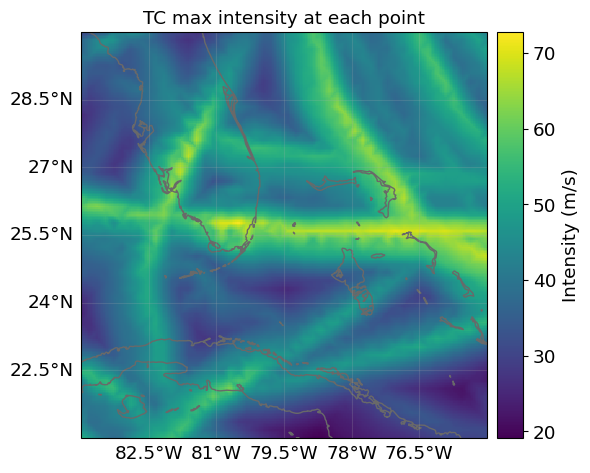

In [5]:
#plot the hazard intensity with the maximum values
haz.plot_intensity(0, figsize=(6, 6));

In [16]:
####print out the 216 event names in the dataset
#help(haz)
haz.event_name

['1990203N09318',
 '1990206N34285',
 '1990212N10338',
 '1990215N38337',
 '1990216N13281',
 '1990224N09328',
 '1990236N13314',
 '1990237N13325',
 '1990247N07337',
 '1990264N14328',
 '1990277N16301',
 '1990279N36316',
 '1990283N23281',
 '1990289N22300',
 '1991181N26282',
 '1991228N26286',
 '1991237N15337',
 '1991248N27304',
 '1991250N10334',
 '1991252N24311',
 '1991288N19274',
 '1991298N13318',
 '1991299N27295',
 '1991302N44301',
 '1992113N24301',
 '1992178N25275',
 '1992207N29298',
 '1992230N11325',
 '1992262N34301',
 '1992266N30327',
 '1992267N33285',
 '1992270N11325',
 '1992271N26291',
 '1992297N26299',
 '1993152N22276',
 '1993169N21268',
 '1993217N10320',
 '1993227N14301',
 '1993235N20307',
 '1993236N14329',
 '1993251N25293',
 '1993258N11279',
 '1993262N27298',
 '1993273N30297',
 '1994181N22276',
 '1994201N32281',
 '1994227N29273',
 '1994229N11321',
 '1994242N20267',
 '1994253N13303',
 '1994265N10330',
 '1994268N16276',
 '1994271N14339',
 '1994272N20274',
 '1994306N23313',
 '1994313N

In [27]:
#help(haz)

Text(0.5, 1.0, 'IRMA')

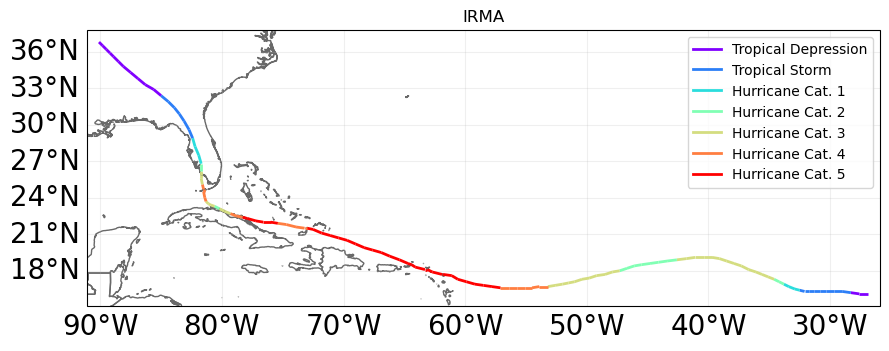

In [107]:
%matplotlib inline
from climada.hazard import TCTracks

tr_irma = TCTracks.from_ibtracs_netcdf(
    provider="usa", storm_id="2017242N16333"
)  # IRMA 2017
ax = tr_irma.plot()
ax.set_title("IRMA")  # set title

2025-07-02 00:09:28,067 - climada.hazard.tc_tracks - WARNING - 19 storm events are discarded because no valid wind/pressure values have been found: 1993178N14265, 1993221N12216, 1993223N07185, 1993246N16129, 1993263N11168, ...
Number of tracks: 33


Text(0.5, 1.0, '1993-1994, EP')

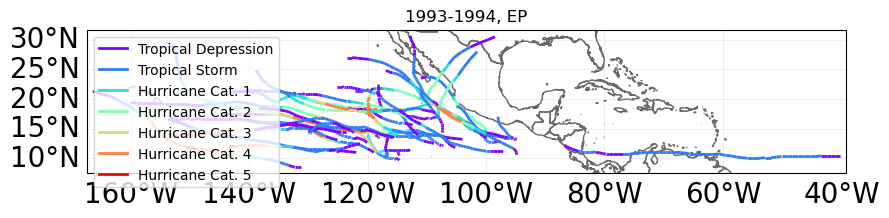

In [6]:
# years 1993 and 1994 in basin EP.
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well
sel_ibtracs = TCTracks.from_ibtracs_netcdf(
    provider="usa", year_range=(1993, 1994), basin="EP", correct_pres=False
)
print("Number of tracks:", sel_ibtracs.size)
ax = sel_ibtracs.plot()
ax.get_legend()._loc = 2  # correct legend location
ax.set_title("1993-1994, EP")  # set title

### Load Exposure data

In [16]:
from climada.entity import Exposures
from climada.util.constants import EXP_DEMO_H5

exp = Exposures.from_hdf5(EXP_DEMO_H5)

/home/wli31/.conda/envs/climada_env/lib/python3.11/pickle.py:1718: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again as this compatibility may be removed in a future version of shapely.
  setstate(state)


In [17]:
print(
    f"In the exposure object, a total amount of {exp.value_unit} {exp.gdf.value.sum() / 1_000_000_000:.2f}B"
    f" is distributed among {exp.gdf.shape[0]} points."
)

In the exposure object, a total amount of USD 657.05B is distributed among 50 points.


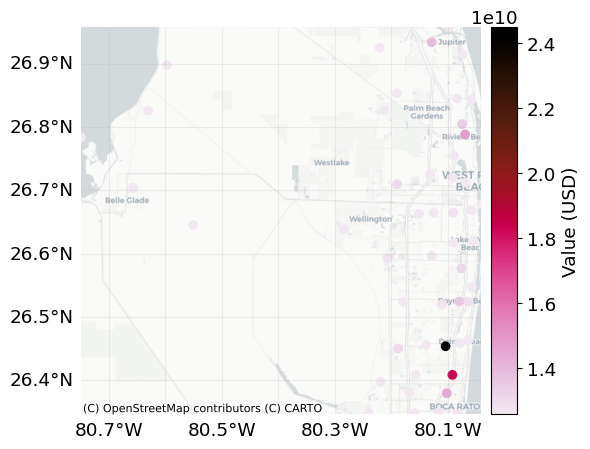

In [18]:
#plot basemap of exposure data
exp.plot_basemap(figsize=(6, 6));

### Load impact function

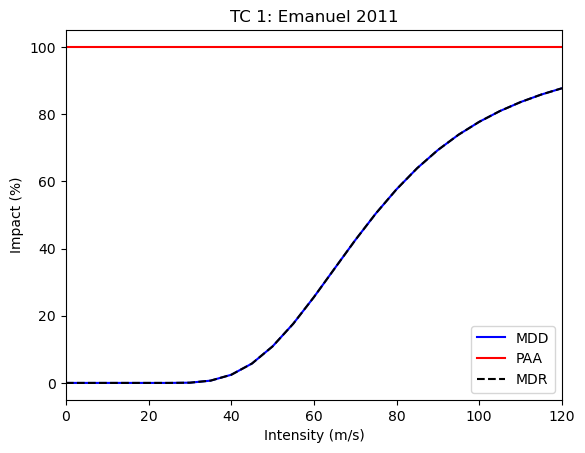

In [4]:
from climada.entity import ImpactFuncSet, ImpfTropCyclone

impf_tc = ImpfTropCyclone.from_emanuel_usa()
impf_set = ImpactFuncSet([impf_tc])
impf_set.plot();

### Impact calculation

In [5]:
from climada.engine import ImpactCalc

imp = ImpactCalc(exp, impf_set, haz).impact(save_mat=True)

In [26]:
print(
    f"The total expected annual impact over all exposure points is {imp.unit} {imp.aai_agg / 1_000_000:.2f} M. \n"
    f"The largest estimated single-event impact is {imp.unit} {max(imp.at_event) / 1_000_000_000:.2f} B. \n"
    f"The largest expected annual impact for a single location is {imp.unit} {max(imp.eai_exp) / 1_000_000:.2f} M. \n"
)

The total expected annual impact over all exposure points is USD 288.90 M. 
The largest estimated single-event impact is USD 20.96 B. 
The largest expected annual impact for a single location is USD 9.58 M. 



<GeoAxes: title={'center': 'Expected annual impact'}>

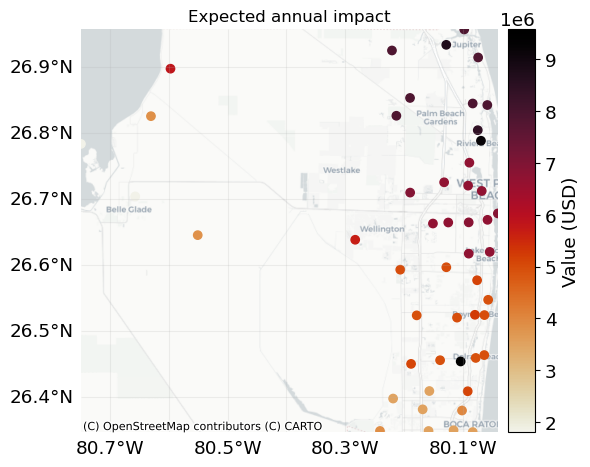

In [28]:
#plot the expected annual impact per location on a map
imp.plot_basemap_eai_exposure(figsize=(6, 6))

<Axes: title={'center': 'Exceedance frequency curve'}, xlabel='Return period (year)', ylabel='Impact (USD)'>

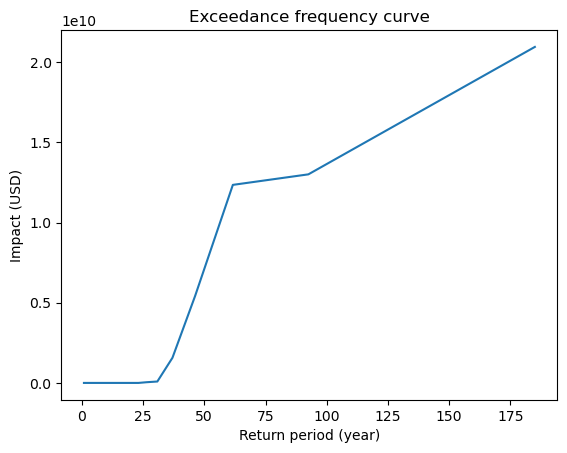

In [74]:
imp.calc_freq_curve().plot()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

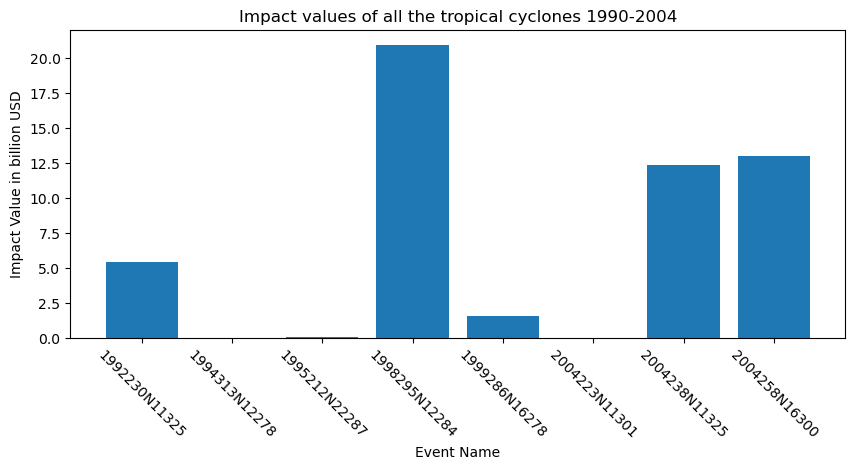

In [65]:
imp_event_nonzero = imp.at_event[imp.at_event > 0.0]
imp_event_nonzero_ind = np.where(imp.at_event > 0.0)
imp_event_nonzero_name = [haz.event_name[i] for i in imp_event_nonzero_ind[0]]
# Plot
plt.figure(figsize=(10, 4)) 
plt.bar(imp_event_nonzero_name, imp_event_nonzero/ 1_000_000_000)
# Labels
plt.xlabel('Event Name')
plt.xticks(rotation=-45)
plt.ylabel('Impact Value in billion USD')
plt.title('Impact values of all the tropical cyclones 1990-2004')
plt.show()
##we can see 1998295N12284 (Hurricane Mitch) and 2004258N16300 (Hurricane Jeanne) have the highest damage 

In [66]:
ind_max=np.argmax(imp.at_event)
highest_event_name = haz.event_name[ind_max]

Text(0.5, 1.0, 'Hurricane MITCH')

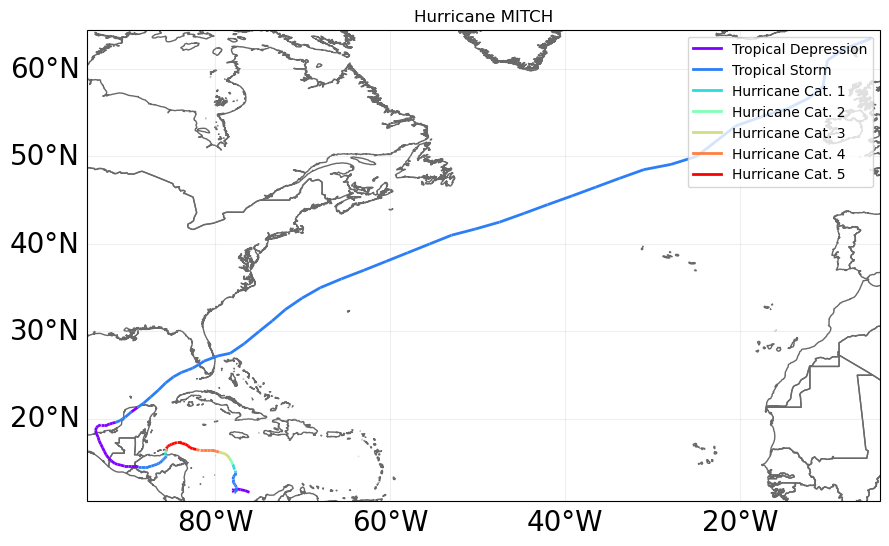

In [69]:
%matplotlib inline
from climada.hazard import TCTracks

tr_mitch = TCTracks.from_ibtracs_netcdf(
    provider="usa", storm_id=highest_event_name
)  # Mitch 1998
ax = tr_mitch.plot()
ax.set_title("Hurricane MITCH")  # set title

2025-07-02 23:38:19,434 - climada.hazard.tc_tracks - WARNING - 19 storm events are discarded because no valid wind/pressure values have been found: 1993178N14265, 1993221N12216, 1993223N07185, 1993246N16129, 1993263N11168, ...
Number of tracks: 33


Text(0.5, 1.0, '1993-1994, EP')

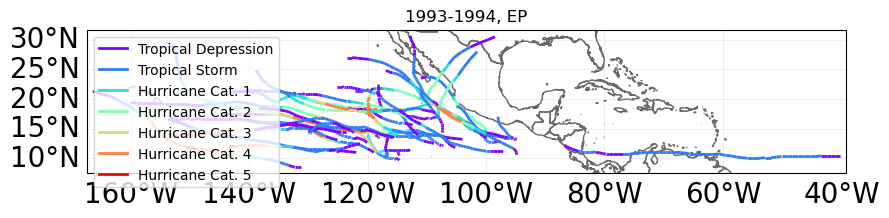

In [68]:
# years 1993 and 1994 in basin EP.
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well
sel_ibtracs = TCTracks.from_ibtracs_netcdf(
    provider="usa", year_range=(1993, 1994), basin="EP", correct_pres=False
)
print("Number of tracks:", sel_ibtracs.size)
ax = sel_ibtracs.plot()
ax.get_legend()._loc = 2  # correct legend location
ax.set_title("1993-1994, EP")  # set title

### construct TropCyclone hazard object from its track

In [105]:
from climada.hazard import Centroids, TropCyclone

# construct centroids
min_lat, max_lat, min_lon, max_lon = 21, 30, -84, -75
cent = Centroids.from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.18)
#cent.plot()

<GeoAxes: title={'center': 'Event ID 1: 1998295N12284'}>

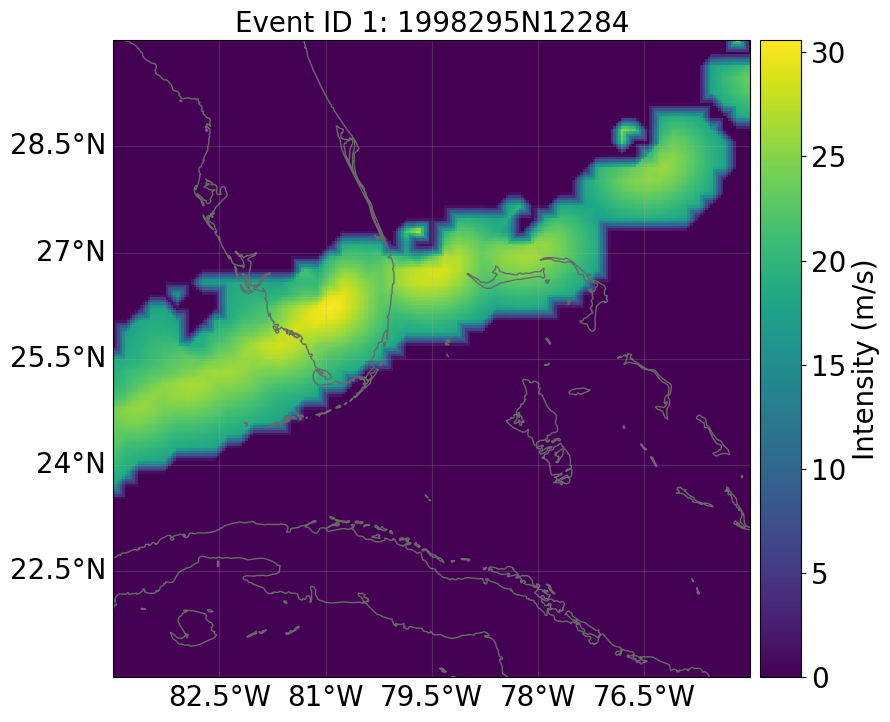

In [112]:
# construct tropical cyclones
#put https://oceancolor.gsfc.nasa.gov/docs/distfromcoast/GMT_intermediate_coast_distance_01d.zip to the data folder
tc_mitch = TropCyclone.from_tracks(tr_mitch, centroids=cent)
tc_mitch.check()
tc_mitch.plot_intensity('1998295N12284')

In [120]:
#apply climate change based on RCP4.5
tc_mitch_cc = tc_mitch.apply_climate_scenario_knu(target_year=2055, scenario="4.5")
#tc_mitch_cc.plot_intensity('1998295N12284')

/home/wli31/.conda/envs/climada_env/lib/python3.11/site-packages/climada/hazard/trop_cyclone/trop_cyclone.py:487: RuntimeWarning: divide by zero encountered in scalar divide
  scale_year_rcp_03 = (


In [121]:
rel_freq_incr = np.round(
    (np.mean(tc_mitch_cc.frequency) - np.mean(tc_mitch.frequency))
    / np.mean(tc_mitch.frequency)
    * 100,
    0,
)

print(
    f"\nA TC like Mitch would undergo a frequency increase of about {rel_freq_incr} % in 2055 under RCP 45"
)


A TC like Mitch would undergo a frequency increase of about 6.0 % in 2055 under RCP 45


In [123]:
#only frequency is changed and intensity not. So the impact values are the same
imp_mitch = ImpactCalc(exp, impf_set, tc_mitch).impact(save_mat=True)
imp_mitch_cc = ImpactCalc(exp, impf_set, tc_mitch_cc).impact(save_mat=True)

### Expand the hazard to 1980 to 2020

In [9]:
#https://medium.com/%40leopold.cosson/how-to-manage-climate-risk-in-finance-with-climada-2fe1d10ea9ef
from climada.util.api_client import Client

In [10]:
# Open a client
client = Client()

In [133]:
# Get tropical cyclone infos
tc_infos = client.list_dataset_infos(data_type='tropical_cyclone')

In [136]:
# Get all possible property knowing we're looking USA
client.get_property_values(tc_infos, known_property_values = {'country_iso3alpha': 'USA'})

{'res_arcsec': ['150'],
 'event_type': ['synthetic', 'observed'],
 'model_name': ['random_walk', 'STORM'],
 'spatial_coverage': ['country'],
 'climate_scenario': ['rcp26', 'rcp45', 'None', 'rcp60', 'rcp85'],
 'ref_year': ['2040', '2060', '2080'],
 'country_iso3alpha': ['USA'],
 'country_name': ['United States'],
 'country_iso3num': ['840'],
 'gcm': ['CMCC-CM2-VHR4', 'CNRM-CM6-1-HR']}

In [137]:
#get hazard data from 1980 to 2020
hazard0 = client.get_hazard('tropical_cyclone', properties={'country_iso3alpha': 'USA', 'climate_scenario': 'None', 'event_type': 'observed'})

In [140]:
imp0 = ImpactCalc(exp, impf_set, hazard0).impact(save_mat=True)

In [141]:
print(
    f"The total expected annual impact over all exposure points is {imp0.unit} {imp0.aai_agg / 1_000_000_000:.2f} B. \n"
    f"The largest estimated single-event impact is {imp0.unit} {max(imp0.at_event) / 1_000_000_000:.2f} B. \n"
    f"The largest expected annual impact for a single location is {imp0.unit} {max(imp0.eai_exp) / 1_000_000:.2f} M. \n"
)

The total expected annual impact over all exposure points is USD 4140.57 M. 
The largest estimated single-event impact is USD 95.56 B. 
The largest expected annual impact for a single location is USD 172.19 M. 



<GeoAxes: title={'center': 'Expected annual impact'}>

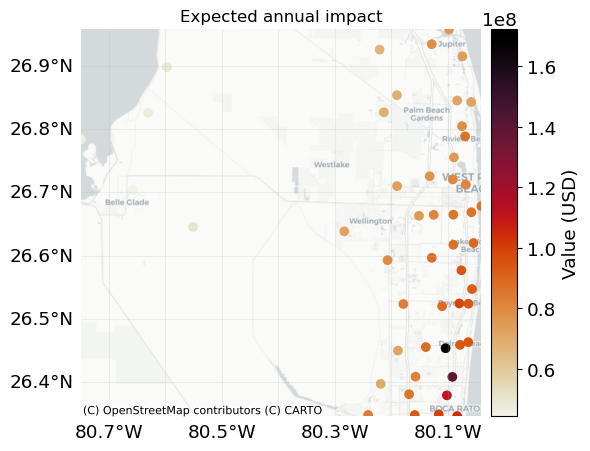

In [151]:
#plot the expected annual impact per location on a map
imp0.plot_basemap_eai_exposure(figsize=(6, 6))

In [143]:
#get hazard data for RCP4.5
hazard45 = client.get_hazard('tropical_cyclone', properties={'country_iso3alpha': 'USA', 'climate_scenario': 'rcp45', 'ref_year': '2040'})

In [147]:
imp45 = ImpactCalc(exp, impf_set, hazard45).impact(save_mat=True)

In [148]:
print(
    f"The total expected annual impact over all exposure points is {imp45.unit} {imp45.aai_agg / 1_000_000_000:.2f} B. \n"
    f"The largest estimated single-event impact is {imp45.unit} {max(imp45.at_event) / 1_000_000_000:.2f} B. \n"
    f"The largest expected annual impact for a single location is {imp45.unit} {max(imp0.eai_exp) / 1_000_000:.2f} M. \n"
)

The total expected annual impact over all exposure points is USD 4449.07 M. 
The largest estimated single-event impact is USD 201.66 B. 
The largest expected annual impact for a single location is USD 172.19 M. 



<GeoAxes: title={'center': 'Expected annual impact'}>

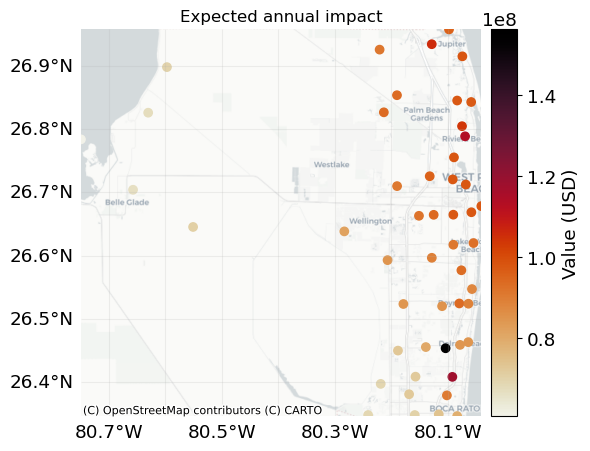

In [150]:
#plot the expected annual impact per location on a map
imp45.plot_basemap_eai_exposure(figsize=(6, 6))

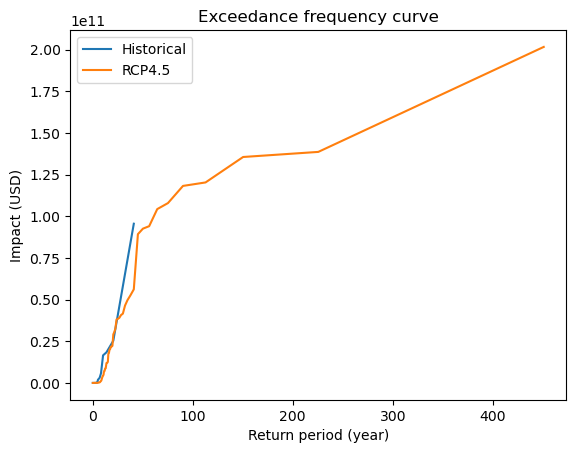

In [153]:
ax = imp0.calc_freq_curve().plot(label="Historical")
imp45.calc_freq_curve().plot(axis=ax, label="RCP4.5")
ax.legend()

# River Flood Hazard

### load impact function for river flood

In [14]:
#https://climada-petals.readthedocs.io/en/latest/tutorial/climada_hazard_RiverFlood.html#setting-jrc-damage-functions
from climada_petals.entity.impact_funcs.river_flood import ImpfRiverFlood,flood_imp_func_set
from climada.engine import ImpactCalc

<Axes: title={'center': 'RF 41: Flood NorthAmerica JRC Residential noPAA'}, xlabel='Intensity (m)', ylabel='Impact (%)'>

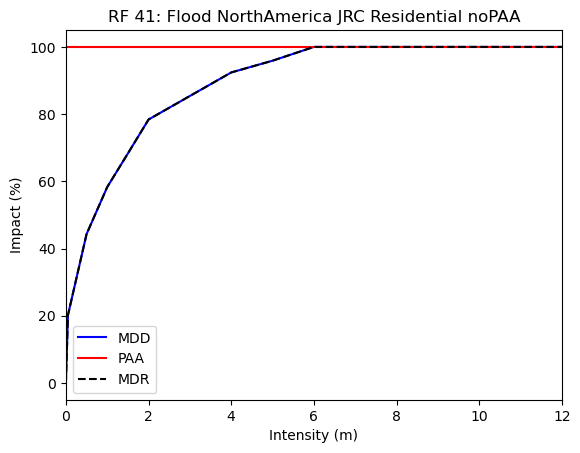

In [42]:
impf_set = flood_imp_func_set()
#RF1: Africa RF2: Asia RF3: Europe RF4: North America RF5: Oceania RF6: South America
impf_NA = impf_set.get_func(fun_id=41)
impf_NA[0].plot()

In [11]:
# Get tropical cyclone infos
rf_infos = client.list_dataset_infos(data_type='river_flood')

In [12]:
# Get all possible property knowing we're looking USA
client.get_property_values(rf_infos, known_property_values = {'country_iso3alpha': 'USA'})

{'res_arcsec': ['150'],
 'climate_scenario': ['rcp26', 'rcp85', 'historical', 'rcp60'],
 'year_range': ['2010_2030',
  '2030_2050',
  '2050_2070',
  '2070_2090',
  '1980_2000'],
 'spatial_coverage': ['country'],
 'country_iso3alpha': ['USA'],
 'country_name': ['United States'],
 'country_iso3num': ['840']}

In [37]:
#get hazard data from 1980 to 2020
hazard0 = client.get_hazard('river_flood', properties={'country_iso3alpha': 'USA', 'climate_scenario': 'historical', 'year_range': '1980_2000'})

### Generating Exposure data from LitPop

In [32]:
from climada.entity import LitPop
lp_exp = LitPop.from_countries(['USA'], fin_mode='pc')
lp_exp.gdf

21.4kKB [00:00, 63.6kKB/s]                           


2025-07-03 19:27:59,784 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:27:59,800 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:27:59,816 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:27:59,832 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:27:59,849 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:27:59,868 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:27:59,899 - climada.entity.exposures.litpop.gpw_populati

26.8kKB [00:00, 98.2kKB/s]                           


2025-07-03 19:28:17,410 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:28:17,600 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:28:17,785 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:28:17,983 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:28:18,158 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:28:18,343 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:28:18,536 - climada.entity.exposures.litpop.gpw_populati

26.7kKB [00:00, 82.9kKB/s]                           


2025-07-03 19:30:16,076 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:30:16,780 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:30:17,487 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:30:18,195 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:30:18,912 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:30:19,611 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-07-03 19:30:20,320 - climada.entity.exposures.litpop.gpw_populati

,value,region_id,impf_,geometry
0,0.0,840,1,POINT (-171.72917 25.77083)
1,0.0,840,1,POINT (-171.73750 25.76250)
2,0.0,840,1,POINT (-171.72917 25.76250)
3,0.0,840,1,POINT (-171.72917 25.75417)
4,0.0,840,1,POINT (-173.96250 26.06250)
...,...,...,...,...
16075226,0.0,840,1,POINT (172.91250 52.75417)
16075227,0.0,840,1,POINT (172.92083 52.75417)
16075228,0.0,840,1,POINT (172.92917 52.75417)
16075229,0.0,840,1,POINT (172.93750 52.75417)


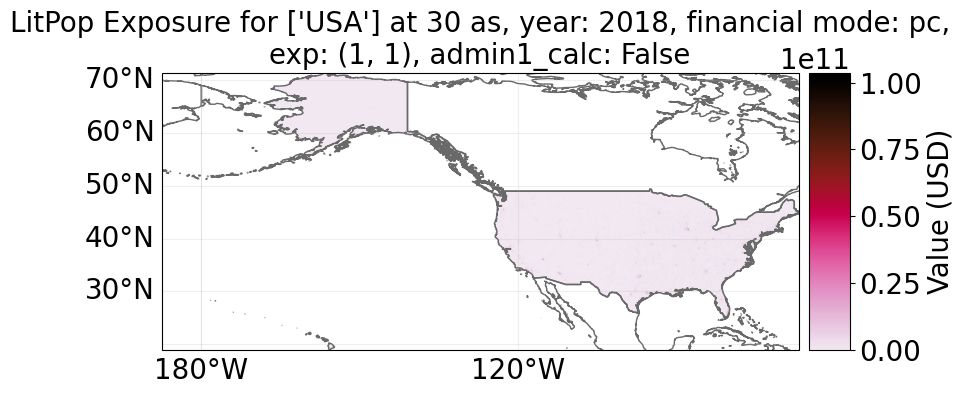

In [55]:
# In the LitPop exposure the damage function for river floods needs
# to be specified manually.
import pandas as pd
from climada_petals.util.constants import RIVER_FLOOD_REGIONS_CSV

info = pd.read_csv(RIVER_FLOOD_REGIONS_CSV)
lp_exp.gdf['impf_RF'] = info.loc[info['ISO']=='USA','impf_RF'].values[0] * 10 +1 #Note: have to add 1 to become 41 to match impact function
lp_exp
lp_exp.plot_hexbin(pop_name=True);

In [56]:
lp_exp.gdf

,value,region_id,impf_,geometry,impf_RF
0,0.0,840,1,POINT (-171.72917 25.77083),41
1,0.0,840,1,POINT (-171.73750 25.76250),41
2,0.0,840,1,POINT (-171.72917 25.76250),41
3,0.0,840,1,POINT (-171.72917 25.75417),41
4,0.0,840,1,POINT (-173.96250 26.06250),41
...,...,...,...,...,...
16075226,0.0,840,1,POINT (172.91250 52.75417),41
16075227,0.0,840,1,POINT (172.92083 52.75417),41
16075228,0.0,840,1,POINT (172.92917 52.75417),41
16075229,0.0,840,1,POINT (172.93750 52.75417),41


In [61]:
from climada.engine import ImpactCalc

imp0 = ImpactCalc(lp_exp, impf_set, hazard0).impact(save_mat=True)

2025-07-03 20:02:56,042 - climada.util.coordinates - WARNING - Distance to closest centroid is greater than 100km for 5 coordinates.


In [63]:
print(
    f"The total expected annual impact over all exposure points is {imp0.unit} {imp0.aai_agg / 1_000_000_000:.2f} B. \n"
    f"The largest estimated single-event impact is {imp0.unit} {max(imp0.at_event) / 1_000_000_000:.2f} B. \n"
    f"The largest expected annual impact for a single location is {imp0.unit} {max(imp0.eai_exp) / 1_000_000:.2f} M. \n"
)

The total expected annual impact over all exposure points is USD 15.93 B. 
The largest estimated single-event impact is USD 514.41 B. 
The largest expected annual impact for a single location is USD 33.22 M. 



In [ ]:
#plot the expected annual impact per location on a map (too long to run)
#imp0.plot_basemap_eai_exposure(figsize=(6, 6))

In [66]:
#get hazard data from 2010 to 2030
hazard1 = client.get_hazard('river_flood', properties={'country_iso3alpha': 'USA', 'climate_scenario': 'rcp26', 'year_range': '2010_2030'})

In [67]:
imp1 = ImpactCalc(lp_exp, impf_set, hazard1).impact(save_mat=True)

2025-07-03 20:17:35,344 - climada.util.coordinates - WARNING - Distance to closest centroid is greater than 100km for 5 coordinates.


In [68]:
print(
    f"The total expected annual impact over all exposure points is {imp1.unit} {imp1.aai_agg / 1_000_000_000:.2f} B. \n"
    f"The largest estimated single-event impact is {imp1.unit} {max(imp1.at_event) / 1_000_000_000:.2f} B. \n"
    f"The largest expected annual impact for a single location is {imp1.unit} {max(imp1.eai_exp) / 1_000_000:.2f} M. \n"
)

The total expected annual impact over all exposure points is USD 52.90 B. 
The largest estimated single-event impact is USD 701.50 B. 
The largest expected annual impact for a single location is USD 60.36 M. 

